## Linear Regression

### Questions:

#### 1. If you take a look at the six graphs below, for which graphs do you think that simple linear regression is suitable, and for which not? Explain your answer for each of the six graphs.

I believe it is suitable for graph b and e because the data points are quite closely clustered together. Therefore we have a high R^2 and a positive (for b)/ negative (for a) correlation coefficient close to 1, meaning the independent variable explains the variability in the dependent variable really well. This would mean a small difference between the residuals for each data point, indicating that linear regression is a suitable prediction method. Moreover, the two graphs are the only graphs where you could fit a linear regression line (equation is y=mx + c) around the data points.

For graphs a and d, a simple linear regression assumes a linear relationship between the independent variable (X) and the dependent variable (Y). Here we would need the equation X^2 to capture the quadratic nature of the relationship accurately.

For graphs c and f, the data points are too far appart, which would mean a big difference between the residuals for each data point. Therefore, a linear regression would not be a suitable prediction method.

#### 2. Why is it essential to minimize the number of residuals in a linear regression model?

It is essential to minimize them because it ensures that the linear relationship between the independent and dependent variables closely matches the observed data. By optimizing the coefficients to minimize residuals, the model provides reliable estimates, resulting in increased accuracy of statistical inferences and hypothesis testing. Additionally, this would ensure their normal distribution around the mean of the data.

#### 3. If we consider the two regression plots below, which of the two plots has the best fitted line?

The second regression plot because it would have the least sum of squares.

#### 4. If we have an ill fitting line, does it help to change the slope of the line to get a better fit? Explain why or why not.

I believe it would help in certain ways because, as the name suggests, the slope of the line could be rotated to as to be a better fit. However, it still wouldn't be the best fit because changing the slope is more of a 'band-aid' solution to an ill fitting line. A proper solution would be to go through the process of summing the squares of the residuals for every rotation of the line, plotting the summs and their corresponding rotations, and then findind the one that has the least sum of squares.

## Implementing in Python

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# For scatter plot
sns.scatterplot(x=independent_variable, y=dependent_variable)

# For residual plot
model = sm.OLS(dependent_variable, sm.add_constant(independent_variables)).fit()
residuals = model.resid
plt.scatter(model.predict(), residuals)

# For partial regression plot
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_partregress_grid(model, fig=fig)

Step 1: Loading the data

In [9]:
housing_data = pd.read_csv('Housing_data.csv', sep=';')
housing_df = pd.DataFrame(housing_data)
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Step 2: Preparing the data for simple Linear Regression

In [10]:
IV = housing_data[['area']]  # Independent variable
DV = housing_data['price']   # Dependent variable
# I renamed the variables IV and DV (for Independent variable and Dependent variable) for easier understanding of the variables, until I get used
# to using them and their functionality in linear regression.

Step 3: Splitting the data into Training and Test sets

In [13]:
# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train, y_test = train_test_split(IV, DV, test_size=0.2, random_state=42)

In [16]:
X_train_simple

,area
46,6000
93,7200
335,3816
412,2610
471,3750
...,...
71,6000
106,5450
270,4500
435,4040


In [17]:
X_test_simple

,area
316,5900
77,6500
360,4040
90,5000
493,3960
...,...
15,6000
357,6930
39,6000
54,6000


In [18]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [19]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

Step 4: Implement Simple Linear Regression

In [21]:
# Create a linear regression model
simple_model = LinearRegression()

# Train the model
simple_model.fit(X_train_simple, y_train)

# Predicting the Test set results
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the Simple Linear Regression Model
simple_mse = mean_squared_error(y_test, y_pred_simple)
simple_r2 = r2_score(y_test, y_pred_simple)

In [23]:
simple_mse

3675286604768.185

In [28]:
import math
root_simple_mse = math.sqrt(simple_mse)
print(root_simple_mse)

1917103.7021424233


This means that, on average, the model's predictions are off by approximately 1,917,103.702 in the original unit, which is a very high difference.

In [24]:
simple_r2

0.27287851871974644

R^2 is also quite low, meaning that the model is not a good fit for the dataset.

Overall, a high MSE indicates larger errors in predictions, and a low R^2 suggests that the model is not explaining much of the variability and that the model is explaining a limited portion of the variability in the dependent variable. Therefore, the model is not a good fit for the dataset and should be improved.

Step 6: Implementing Multiple Linear Regression

In [25]:
# Multiple Linear Regression

# Prepare the data for Multiple Linear Regression
X_multiple = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]  # Independent variables

# Split the data into training and testing sets
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, DV, test_size=0.2, random_state=42)

# Create a linear regression model
multiple_model = LinearRegression()

# Train the model
multiple_model.fit(X_train_multiple, y_train)

# Predicting the Test set results
y_pred_multiple = multiple_model.predict(X_test_multiple)

# Evaluate the Multiple Linear Regression Model
multiple_mse = mean_squared_error(y_test, y_pred_multiple)
multiple_r2 = r2_score(y_test, y_pred_multiple)

In [26]:
multiple_mse

2292721545725.362

In [29]:
root_multiple_mse = math.sqrt(multiple_mse)
print(root_multiple_mse)

1514173.5520492233


On average, the model's predictions are off by approximately 1,514,173.552 in the original unit, which is also a very high difference.

In [27]:
multiple_r2

0.5464062355495872

R^2 is a moderate fit, suggesting that the model is explaining a substantial portion of the variability, but there is still room for improvement.

In conclusion, the model is a moderate fit for the dataset. However, improvements should be made.

#### 1. Which model performs better, with one or multiple variables?

The one with multiple variables.

#### 2. Give an explanation of why you think that one model outperforms the other model.

I believe the model with multiple variables performs better because predicting a variable such as price is more complicated to properly do using a single variable. Multiple variables allow the model to capture the complex relationships that determining housing prices requires. Additionally, a model that considers multiple variables can distinguish between outliers that are relevant to the underlying patterns and those that are not, leading to a more interpretable model.

#### Re-doing the step-by-step methodology after pre-processing.

Step 1: Pre-processing

In [30]:
# One-hot encoding categorical variables
data_encoded = pd.get_dummies(housing_data, drop_first=True)

# Splitting the dataset into features and target variable
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the first few rows of the processed data
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


Step 2: Train the Linear Regression Model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R squared:", r2)

Mean Squared Error: 976484771024.6129
Root Mean Squared Error: 988172.4399236264
R squared: 0.6611214250980096


Interpretation:

MSE: This is a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model. The lower the MSE, the better the model. In this case, the MSE is quite large, which might indicate that the model's predictions are considerably different from the actual values.

R²: This is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit. An R² of 0.6491 suggests that around 65% of the variance in the housing prices is explained by the model, which is a moderate fit.

## Application in Football Player Data

In [110]:
NAC_data =  pd.read_csv('NAC_data.csv')
NAC_df =  pd.DataFrame(NAC_data)
NAC_df.head()

,Unnamed: 0,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
0,0,P. Iemmello,Catanzaro,Catanzaro,CF,31.0,750000,NaN,38,3109,...,NaN,0.00,NaN,NaN,0.00,0.00,0.0,0.00,5,80.0
1,1,J. Petriccione,Crotone,Crotone,"DMF, RDMF, RCMF",28.0,700000,2024-06-30,36,3341,...,NaN,0.32,NaN,NaN,1.29,0.11,25.0,1.97,0,0.0
2,2,T. Biasci,Catanzaro,Catanzaro,"CF, LWF, AMF",28.0,550000,2024-06-30,38,2488,...,NaN,0.07,NaN,NaN,0.00,0.00,0.0,0.00,2,50.0
3,3,E. Volpicelli,Sangiuliano City,Sangiuliano City,"CF, RWF, AMF",30.0,500000,2024-06-30,34,2639,...,NaN,0.10,NaN,NaN,2.28,0.55,50.0,3.04,0,0.0
4,4,A. Curcio,Catanzaro,Catanzaro,"CF, AMF, LWF",33.0,500000,2024-06-30,38,1456,...,NaN,0.00,NaN,NaN,0.62,0.31,20.0,0.31,1,0.0


2. Data Preprocessing

In [35]:
# I decided to exclude the players whose market value is 0 for this linear regression, as I do not believe they are going to be useful for the model.
NAC_df = NAC_df.dropna(subset='Market value')

3. Feature Selection

In [111]:
# I decided to keep only certain columns that I consider important metrics for determining a player's market value.
columns_to_keep = ['Market value','Age', 'Minutes played', 'Aerial duels won, %', 'Goals', 'Assists', 'Shots on target, %', 'Goal conversion, %', 'Accurate passes, %']
NAC_df.drop(columns=NAC_df.columns.difference(columns_to_keep), inplace=True)
NAC_df

,Age,Market value,Minutes played,Goals,Assists,"Aerial duels won, %","Shots on target, %","Goal conversion, %","Accurate passes, %"
0,31.0,750000,3109,30,6,42.22,58.42,29.703,77.91
1,28.0,700000,3341,2,3,36.96,32.00,8.000,86.81
2,28.0,550000,2488,17,4,36.73,50.75,25.373,73.98
3,30.0,500000,2639,3,6,31.43,34.29,4.286,67.74
4,33.0,500000,1456,9,3,40.32,37.50,16.071,72.89
...,...,...,...,...,...,...,...,...,...
16530,18.0,0,708,0,0,38.46,0.00,0.000,82.29
16531,20.0,0,1695,0,1,23.33,8.33,0.000,84.26
16532,20.0,0,1109,0,3,30.43,14.29,0.000,81.20
16533,26.0,0,599,0,0,100.00,0.00,0.000,78.65


4. Model Development

Model Development #1

In [97]:
# Some columns containted NaN values. I used imputation to handle them.
from sklearn.impute import SimpleImputer
numeric_columns = NAC_df.select_dtypes(include=['number']).columns
df_numeric = NAC_df[numeric_columns]

# Imputing with the mean
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
df_imputed = pd.concat([df_numeric_imputed, NAC_df[NAC_df.columns.difference(numeric_columns)]], axis=1)

# Splitting the dataset into features and target variables
X_nac = df_imputed.drop('Market value', axis=1)
y_nac = df_imputed['Market value']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_nac, y_nac, test_size=0.2, random_state=20)

# Creating a linear regression model
NAC_model =  LinearRegression()
NAC_model.fit(X_nac, y_nac)

# Making predictions on the test set
y_pred_nac = NAC_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_nac)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_nac)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R squared:", r2)

Mean Squared Error: 1118264195061.8787
Root Mean Squared Error: 1057480.1156815568
R squared: 0.06963934973495933


The root mean squared error is very high, while the R^2 is very low, indicating a bad linear regression fit for the dataset.

In [66]:
# Coefficients and intercept
coefficients = NAC_model.coef_
intercept = NAC_model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Coefficients: [-9.17689316e+03  5.90629997e+01  7.94871073e+04  9.91114895e+04
  1.09352894e+03  1.66673335e+03 -4.69191526e+03  2.44608513e+04]
Intercept: -1579567.2050171695


A low correlation between two variables might suggest that their relationship is not linear.

I will create scatter plots for the independent variables whose correlation coefficient was significantly lower.

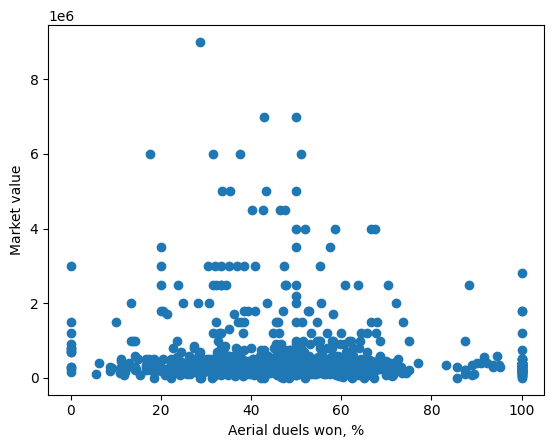

In [92]:
NAC_df_truncated =  NAC_df.iloc[:1000,:]
# The dataset was truncated because I only wish to get an idea of how the independent variables relate to the dependent ones. 
# The whole dataset might make the scatter plot look too crowded.

y_nac_truncated = NAC_df_truncated['Market value']
plt.scatter(NAC_df_truncated['Aerial duels won, %'], y_nac_truncated)
plt.xlabel('Aerial duels won, %')
plt.ylabel('Market value')
plt.show()

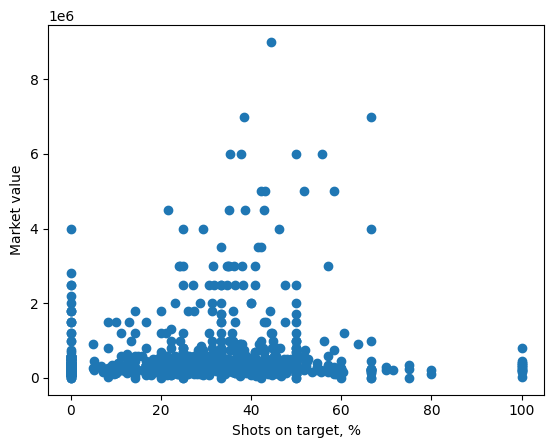

In [95]:
plt.scatter(NAC_df_truncated['Shots on target, %'], y_nac_truncated)
plt.xlabel('Shots on target, %')
plt.ylabel('Market value')
plt.show()

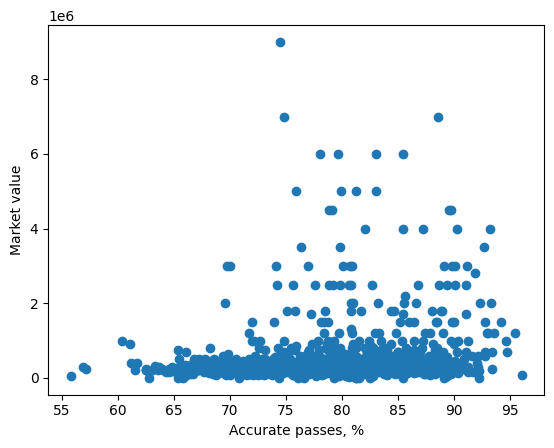

In [96]:
plt.scatter(NAC_df_truncated['Accurate passes, %'], y_nac_truncated)
plt.xlabel('Accurate passes, %')
plt.ylabel('Market value')
plt.show()

The relationships seem to have an equation of y = a, which is not the equation for a linear regression.

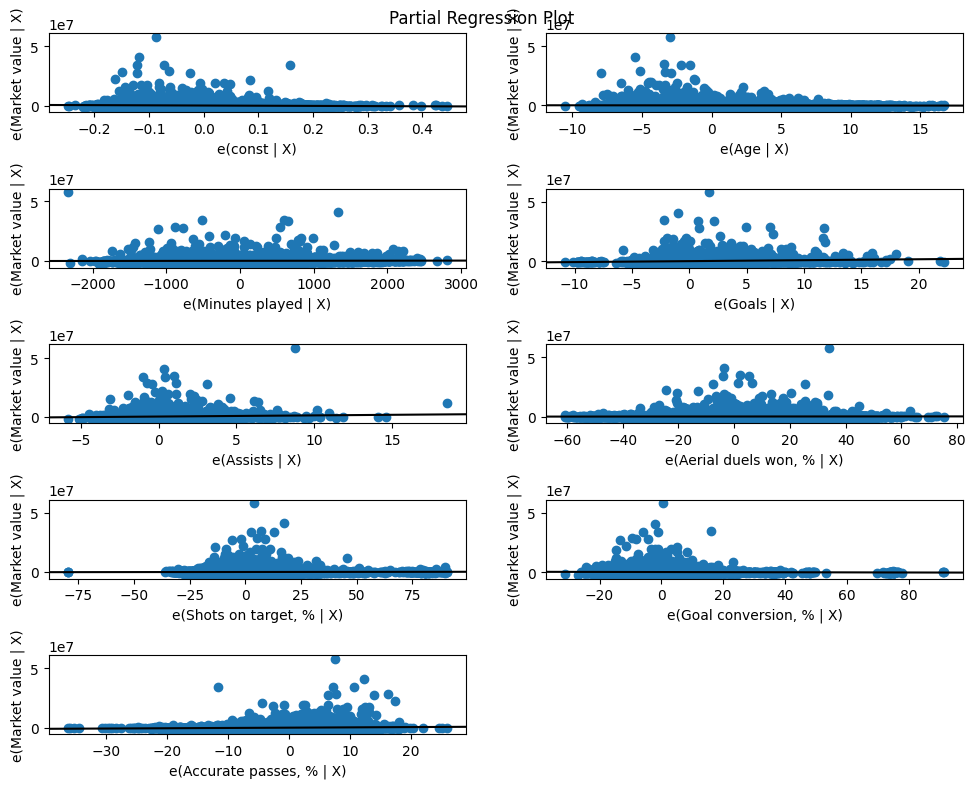

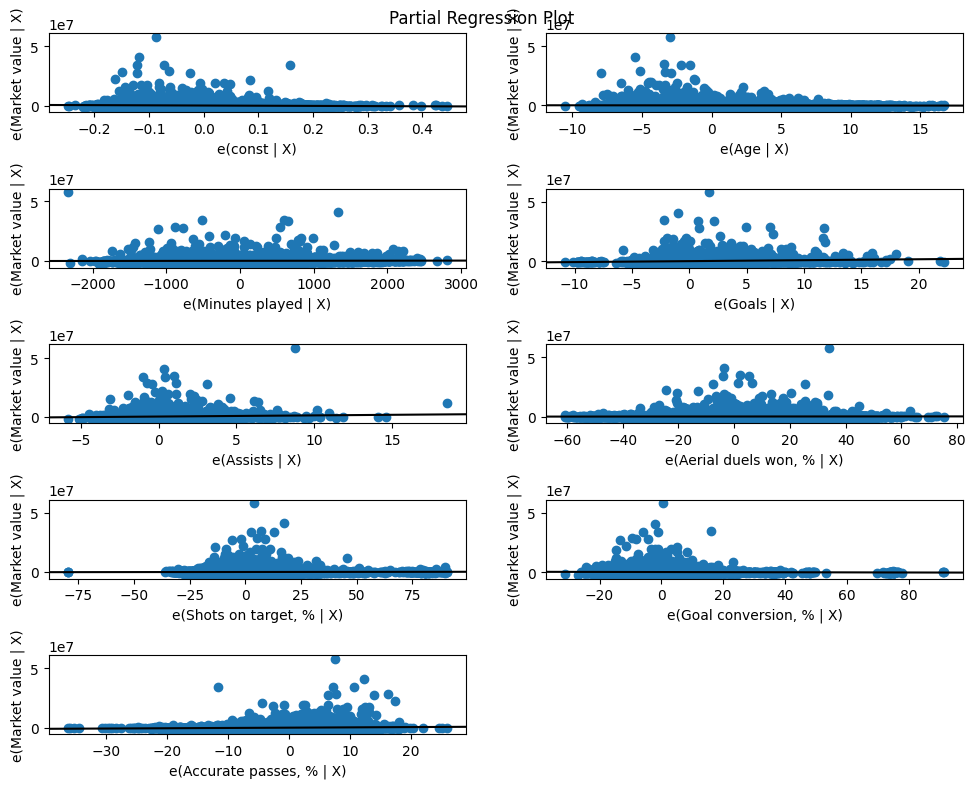

In [102]:
# For partial regression plot
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)

Model Development #2

In [112]:
# I decided to keep only the columns with the IV that had a higher correlation coefficient.
columns_to_keep = ['Market value','Age', 'Minutes played', 'Aerial duels won, %', 'Goals', 'Goal conversion, %']
NAC_df.drop(columns=NAC_df.columns.difference(columns_to_keep), inplace=True)
NAC_df

,Age,Market value,Minutes played,Goals,"Aerial duels won, %","Goal conversion, %"
0,31.0,750000,3109,30,42.22,29.703
1,28.0,700000,3341,2,36.96,8.000
2,28.0,550000,2488,17,36.73,25.373
3,30.0,500000,2639,3,31.43,4.286
4,33.0,500000,1456,9,40.32,16.071
...,...,...,...,...,...,...
16530,18.0,0,708,0,38.46,0.000
16531,20.0,0,1695,0,23.33,0.000
16532,20.0,0,1109,0,30.43,0.000
16533,26.0,0,599,0,100.00,0.000


In [113]:
# Same process as before
from sklearn.impute import SimpleImputer
numeric_columns = NAC_df.select_dtypes(include=['number']).columns
df_numeric = NAC_df[numeric_columns]

# Imputing with the mean
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
df_imputed = pd.concat([df_numeric_imputed, NAC_df[NAC_df.columns.difference(numeric_columns)]], axis=1)

# Splitting the dataset into features and target variables
X_nac = df_imputed.drop('Market value', axis=1)
y_nac = df_imputed['Market value']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_nac, y_nac, test_size=0.2, random_state=20)

# Creating a linear regression model
NAC_model =  LinearRegression()
NAC_model.fit(X_nac, y_nac)

# Making predictions on the test set
y_pred_nac = NAC_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_nac)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_nac)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R squared:", r2)

Mean Squared Error: 1143749841403.2405
Root Mean Squared Error: 1069462.4076624855
R squared: 0.04843609328869336


The root mean squared error is better this time, meaning the model's predictions are closer to the actual values. However, R^2 is even lower than before, suggesting that the model does not explain much of the variability in the data. It may not be capturing the underlying patterns well, and the predictions may not be significantly better than using the mean of the dependent variable.

The model still needs tuning and refining.

Model Development #3 (Simple Linear Regression)

In [119]:
# Preparing the data
NAC_df = NAC_df.dropna(subset='Goals')
X_nac_simple = NAC_df[['Goals']]  # Independent variable
y_nac_simple = NAC_df['Market value']   # Dependent variable

# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_nac_simple, y_nac_simple, test_size=0.2, random_state=42)

# Implementing the linear regression model
# Creating a linear regression model
simple_nac_model = LinearRegression()

# Train the model
simple_nac_model.fit(X_train_simple, y_train)

# Predicting the Test set results
y_pred_simple = simple_nac_model.predict(X_test_simple)

# Evaluate the Simple Linear Regression Model
simple_nac_mse = mean_squared_error(y_test, y_pred_simple)
simple_nac_r2 = r2_score(y_test, y_pred_simple)
print(f'Mean Square Error:{simple_nac_mse}\nRoot Mean Squared Error:{math.sqrt(simple_nac_mse)}\nR squared:{simple_nac_r2}')

Mean Square Error:1656245905443.7368
Root Mean Squared Error:1286952.1768285474
R squared:-0.0002406242526180602


The model is still not performing well.